# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [34]:
# Your import 
import pandas as pd
import numpy as np

# Load the Pokémon dataset
pokemon_data =  pd.read_csv("pokemon.csv")# Your code

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [41]:
# Create a derived feature: sp_attack_to_sp_defense_ratio


# your code

pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack'] / pokemon_data['sp_defense']
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'capture_rt', 'total_bs', 'sp_attack_to_sp_defense_ratio', 'type']
target = 'legendary'

# Select all features + derived  
# target: Legendary 
# Your code

X = pokemon_data[features] # Your code
y = pokemon_data[target] # Your code

### 2.2 Data Transformation Using ColumnTransformer

In [49]:
# Your import 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler

# Categorical and numerical columns
# your code

categorical_features = ['type']
numeric_features = [col for col in features if col not in categorical_features]

numeric_transformer = MaxAbsScaler()
categorical_transformer = OneHotEncoder()
# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
# Your code

preprocessor = ColumnTransformer(
    transformers= [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', MaxAbsScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'capture_rt',
                                  'total_bs',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [54]:
from sklearn.model_selection import train_test_split

# Transform the data

X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split

#Your code

X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y, test_size=0.3, random_state=42, stratify=y)



In [58]:
# Your import 

# Please use train_test_split to prepare your data

# Your code

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[0.35135135, 0.2826087 , 0.20618557, 0.17391304, 0.08333333,
         0.74509804, 0.40384615, 0.27007299, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        ],
        [0.45405405, 0.30434783, 0.33505155, 0.30434783, 0.28333333,
         0.17647059, 0.52564103, 0.25078206, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),
 array([[0.51351351, 0.36956522, 0.56701031, 0.41304348, 0.43888889,
         0.17647059, 0.68589744, 0.3127161 , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 

## Step 3: Logistic Regression

In [67]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model

logistic_model = LogisticRegression(max_iter=500, random_state=42)

# Train Logistic Regression

logistic_model.fit(X_train, y_train)


# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.

y_val_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic)

y_val_pred_logistic = logistic_model.predict(X_val)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)






print("<Your name> + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

<Your name> + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.83      0.50      0.62        10

    accuracy                           0.95       120
   macro avg       0.89      0.75      0.80       120
weighted avg       0.95      0.95      0.94       120

Validation AUC: 0.9855
Validation accuracy: 0.9500


## Step 4: Multi-Layer Perceptron (MLP)

In [134]:
from sklearn.neural_network import MLPClassifier

# Please build your Multi-Layer Perceptron model

mlp_model = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=500)

# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
# Your code
mlp_model.fit(X_train, y_train)

# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
# Your code

y_val_pred_mlp = mlp_model.predict(X_val)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)

y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)




# Train MLP Classifier


# Evaluate MLP Classifier


print("<Your name> + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

<Your name> + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       110
           1       0.75      0.30      0.43        10

    accuracy                           0.93       120
   macro avg       0.84      0.65      0.70       120
weighted avg       0.92      0.93      0.92       120

Validation AUC: 0.9436
Validation accuracy: 0.9333


C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [138]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Please record your loss of logistic regression with 500 iterations
# Your code

logistic_model = LogisticRegression(max_iter=1, solver='saga', random_state=42, warm_start=True)

# Initialize the model with warm_start to fit incrementally


# To store the loss values
loss_curve = []

# Train the model incrementally
# Your code
for i in range(1, 501):
    logistic_model.fit(X_train, y_train)
    y_train_prob = logistic_model.predict_proba(X_train)
    loss = log_loss(y_train, y_train_prob)
    loss_curve.append(loss)



C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\wodnj\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

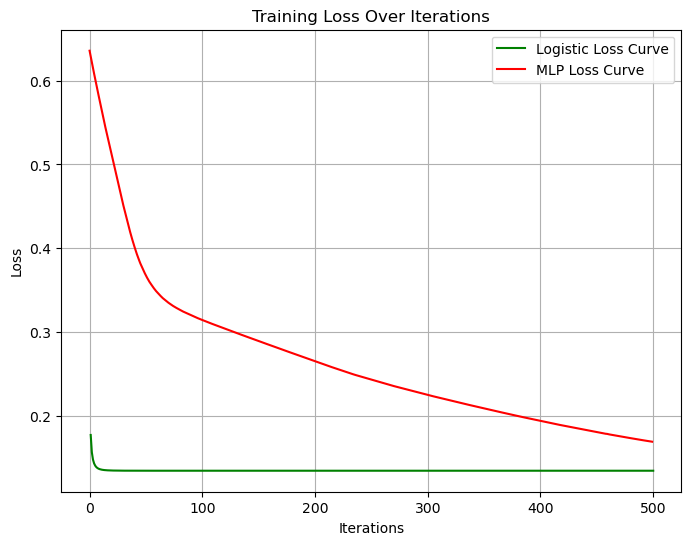

In [139]:
# Extract loss during MLP training
# Your code

import matplotlib.pyplot as plt

mlp_model_loss_curve = mlp_model.loss_curve_
Logic_loss = loss_curve

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
# Your code

plt.figure(figsize=(8,6))
plt.plot(range(1, len(Logic_loss) + 1), Logic_loss,color='green', label="Logistic Loss Curve")
plt.plot(mlp_model_loss_curve, color='red', label="MLP Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.title("Training Loss Over Iterations")
plt.grid()
plt.legend()
plt.show()




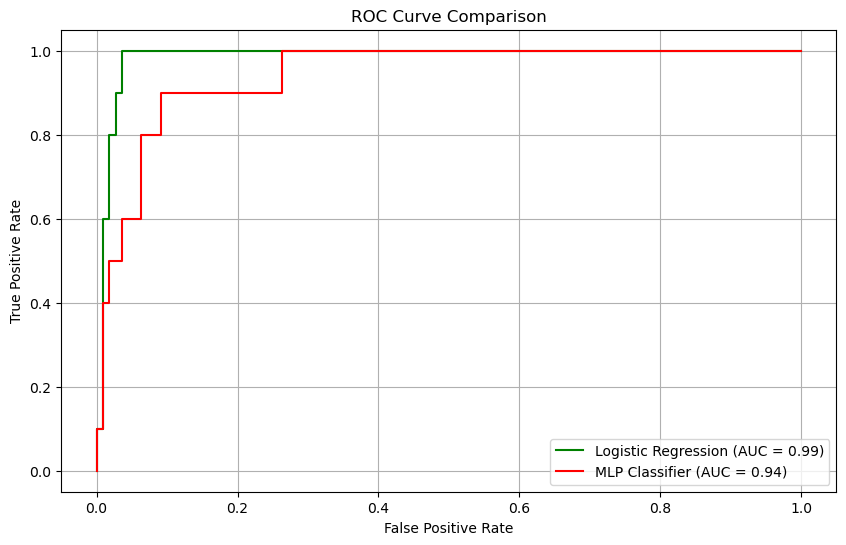

In [140]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Plot ROC Curve Comparison


# Plot ROC curves
# Your code 

fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)

plt.figure(figsize=(10,6))
plt.plot(fpr_logistic, tpr_logistic, color='green', label=f"Logistic Regression (AUC = {auc_val_logistic:.2f})")
plt.plot(fpr_mlp, tpr_mlp, color='red', label=f"MLP Classifier (AUC = {auc_val_mlp:.2f})")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# please set color of Logistic as green, set MLP as red.
# Your code 
 

In [144]:
# Your idea:
As both graph shown above, the logistic regression shows better performance on training while iterations.


SyntaxError: invalid syntax (2000150284.py, line 2)

## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

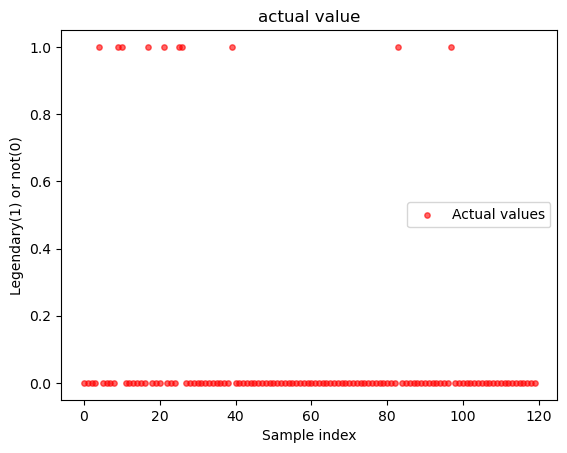

In [148]:
# Please plot the Actual data and Predicted for Logistic and MLP model
# Your code

# actual

plt.scatter(range(len(y_val)), y_val, color='red', alpha=0.6, label="Actual values", s=15)
plt.title("actual value")
plt.xlabel("Sample index")
plt.ylabel("Legendary(1) or not(0)")
plt.legend()
plt.show()

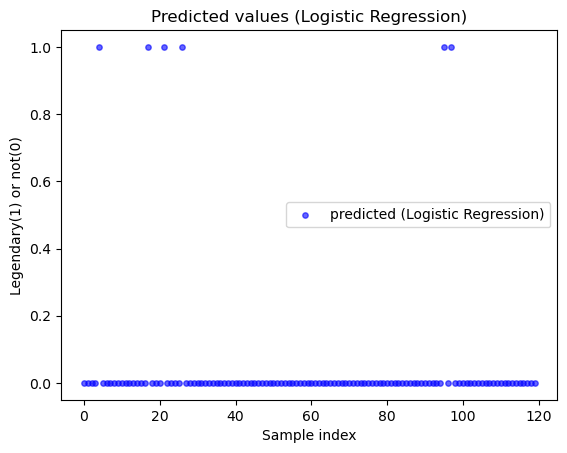

In [150]:
# predicted data (Logistic regression)

plt.scatter(range(len(y_val)), y_val_pred_logistic, color="blue", alpha=0.6, label="predicted (Logistic Regression)", s=15)
plt.title("Predicted values (Logistic Regression)")
plt.xlabel("Sample index")
plt.ylabel("Legendary(1) or not(0)")
plt.legend()
plt.show()

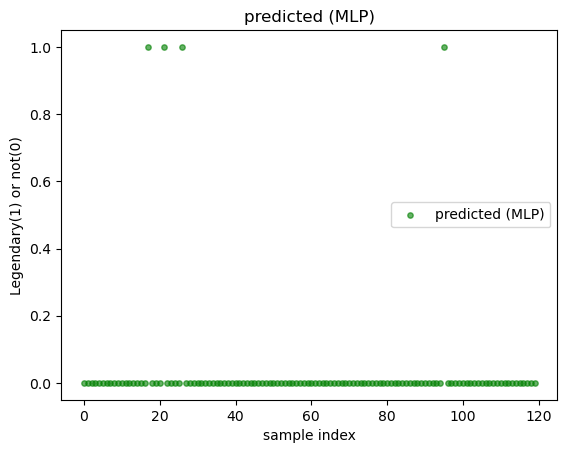

In [152]:
# predicted data (MLP)

plt.scatter(range(len(y_val)), y_val_pred_mlp, color="green", alpha=0.6, label="predicted (MLP)", s=15)
plt.title("predicted (MLP)")
plt.xlabel("sample index")
plt.ylabel("Legendary(1) or not(0)")
plt.legend()
plt.show()


### Confusion Matrices

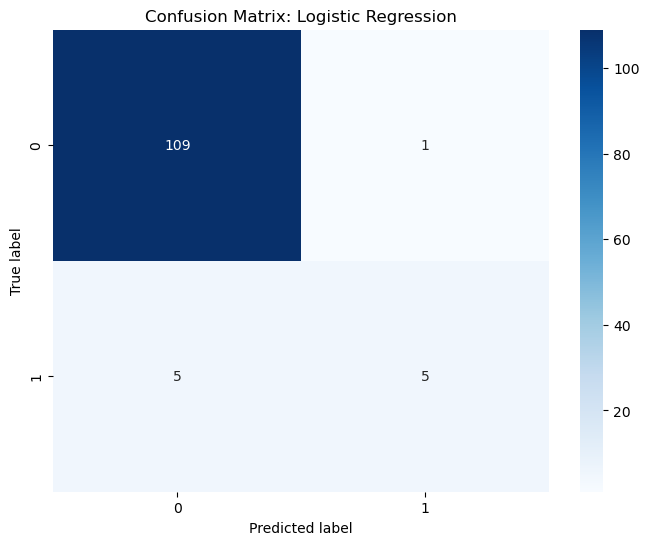

In [155]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression

cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize=(8,6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# your code

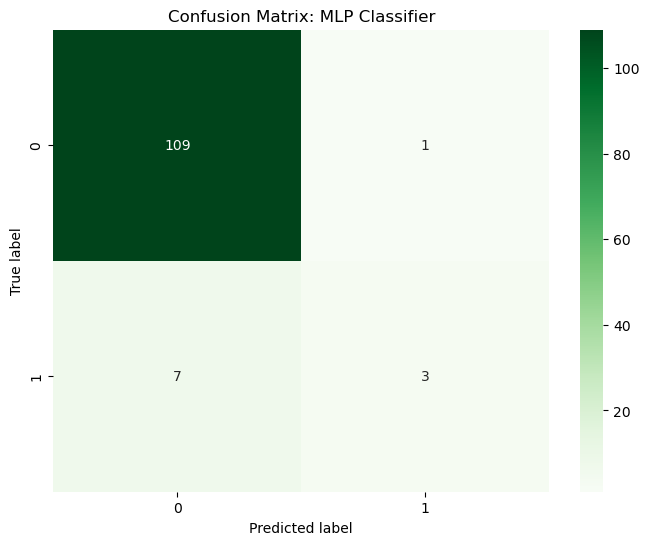

In [157]:
# plot MLP
# Your code
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()


## Conclusion

In [ ]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea : From above plots, we can see that logistic regression predicted more legendaries than MLP model. Also, from above confusion matrixes,
# we can calculate precision by using formula: TP/(TP + FP). 
# precision of logistic regression is: 109 / (109 + 1) = 0.99
# precision of MLP model is: 109 / (109 + 1) = 0.99
# and accuracy can be calculated by using formula: TP + TN / TP + TN + FP + FN
# accuracy of logistic regression is: 109 + 5 / 109 + 5 + 5 + 1 = 0.95
# accuracy of MLP model is: 109 + 3 / 109 + 3 + 1 + 7 = 0.93

# Thus, we can find that predicts more positive result than my MLP model.
# the precision for both models are same, but the accurary of logistic regression model is slightly higher than MLP model.  
